## Installing all the required modules

In [2]:
import ast
import holidays
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from pandas import DataFrame

In [3]:
'''
Get the pre processed data from the data folder.
'''
df = pd.read_csv( "data/preprocessed.csv")
# df

## PLOTS

### 1. Genre vs Revenue

In [4]:
'''
Plot of genre vs Revenue, it takes all the revenues and maps it to indices
'''
genre_set = {'Family', 'Animation', 'Thriller', 'Documentary', 'Music', 'Horror', 'Foreign', 'Western', 'TV Movie',
'Fantasy', 'Mystery', 'Action', 'Romance', 'History', 'Comedy', 'Adventure', 'War', 'Science Fiction', 'Crime', 'Drama'}

def get_genre_map(genre_set):
    genre_map={}
    ind=0
    for genres in genre_set:
        genre_map[genres]=ind
        ind+=1
    return genre_map

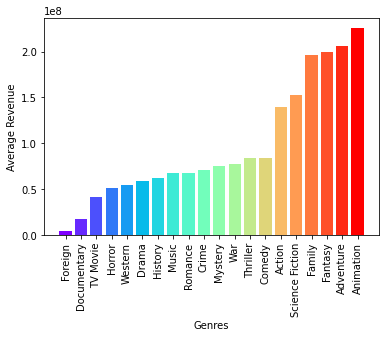

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

'''
Code to plot average revenue vs genre.
'''
def plot(x,y):
    colors = cm.rainbow(np.linspace(0, 1, 20))
    idx     = np.argsort(y)
    y = np.array(y)[idx]
    x = np.array(x)[idx]
    plt.bar(x,y,color=colors)
    # genre.xaxis_date() 
    plt.xticks(rotation=90) 
    plt.xlabel('Genres')
    plt.ylabel('Average Revenue') 
    plt.show()
    return

'''
Get the indices, and kep the average revenue at the respective indices. 
'''
def get_array_genre_vs_revenue(movies,genre_set):
    ith_avg=np.zeros(len(genre_set),)
    genre_list=list(genre_set)
    genre_map=get_genre_map(genre_set)
    for genrename in genre_list:
        revenue_i = np.sum(
            np.multiply
            (
        movies['revenue'],
        movies[genrename]
            ))
        count_i = np.sum(movies[genrename])
        # print(revenue_i,count_i)
        ith_avg[genre_map[genrename]]= revenue_i/count_i
    return ith_avg
    
def plot_genre_vs_revenue(dataframe,genre_set):
    # Get the revenue average per genre
    yarray= get_array_genre_vs_revenue(dataframe,genre_set)
    # Get a list of all the genres
    xarray= list(genre_set)
    #Plot them
    plot(xarray,yarray)
    return

plot_genre_vs_revenue(df,genre_set)

### 2. Revenue Distribution

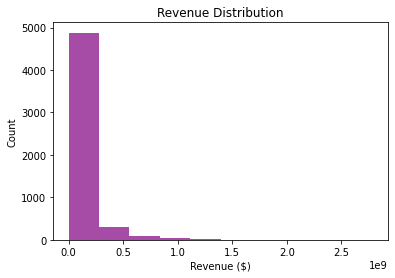

In [23]:
''''
Code to plot a histogram of Revenue distribution. 
'''
def plot_revenue_distribution(movies):
    data=df['revenue'].tolist()
    data.sort()
    plt.hist(data,color="purple", alpha = 0.7)
    plt.xlabel('Revenue ($)')
    plt.ylabel('Count') 
    plt.title("Revenue Distribution")
    plt.show()
    return 
plot_revenue_distribution(df)

### 3. Revenue vs Runtime

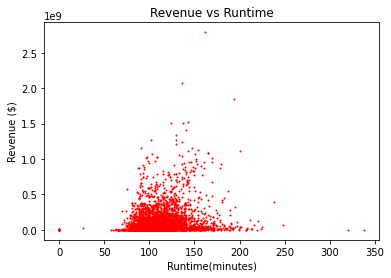

In [26]:
'''
Code to plot the distribution of Revenue vs  Runtime. 
'''
def plot_runtime_vs_revenue(df):
    yarray=df['revenue'].tolist()
    xarray=df['runtime'].tolist()
    plt.scatter(xarray,yarray,color="red",s = 1)
    plt.xlabel('Runtime(minutes)')
    plt.ylabel('Revenue ($)') 
    plt.title("Revenue vs Runtime")
    plt.show()
    return 
plot_runtime_vs_revenue(df)

### 4. Revenue vs Budget

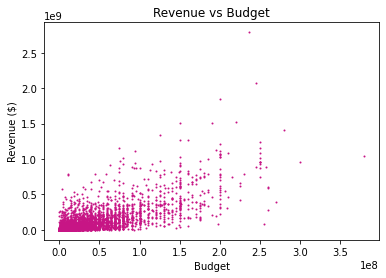

In [9]:
'''
Plot of revenue vs Budget. To show the distribution of budget against revenue. 
'''
def plot_revenue_vs_budget(df):
    yarray=df['revenue'].tolist()
    xarray=df['budget'].tolist()
    plt.scatter(xarray,yarray, color="mediumvioletred", s = 1)
    plt.xlabel('Budget')
    plt.ylabel('Revenue ($)') 
    plt.title("Revenue vs Budget")
    plt.show()
    return 
plot_revenue_vs_budget(df)

### 5. Distribution of countries

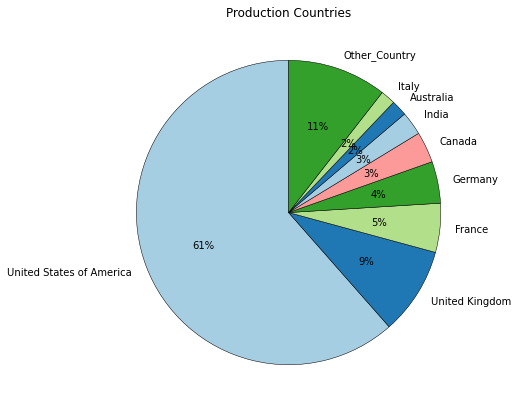

In [39]:
'''
Used to plot a pie distribution of all the countries present
This would help make decision about how many top countries we consider
'''
def plot_countries_distribution(df):
    # List of countries
    c = ['United States of America', 'United Kingdom', 'France', 'Germany', 'Canada', 'India', 'Australia', 'Italy', 'Other_Country']
    val = []
    for i in range(len(c)):
        temp = df.loc[df[c[i]] == 1]
        val.append(temp.shape[0])

    plt.figure(figsize = (10, 7))
    colors = sns.color_palette("Paired",5)
    plt.pie(val, labels = c, colors = colors, 
            startangle=90, 
            wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True},
            autopct='%1.0f%%')
    plt.title('Production Countries')
    plt.show()

plot_countries_distribution(df)

### 6. Distribution of Genres

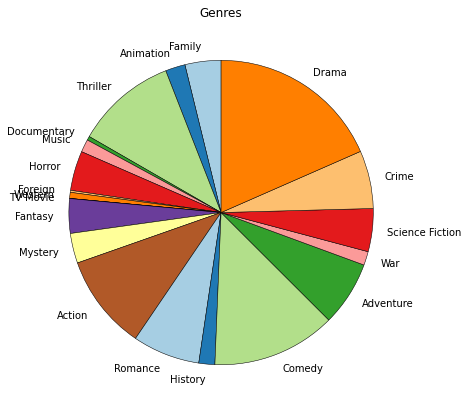

In [35]:
'''
Used to plot a pie distribution (count) of all the genres present
This would help make decision about how many top genres we consider
'''
def plot_genre_distribution(df):
    g = ['Family', 'Animation', 'Thriller', 'Documentary', 'Music', 'Horror', 'Foreign', 'Western', 'TV Movie', 'Fantasy', 'Mystery', 'Action', 'Romance', 'History', 'Comedy', 'Adventure', 'War', 'Science Fiction', 'Crime', 'Drama']
    val = []
    for i in range(len(g)):
        temp = df.loc[df[g[i]] == 1]
        val.append(temp.shape[0])

    fig = plt.figure(figsize = (10, 7))
    colors = sns.color_palette("Paired",30)
    plt.pie(val, labels = g, colors = colors, startangle=90, wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True})
    plt.title('Genres')
    plt.show()
plot_genre_distribution(df)

### 7. Distribution of languages

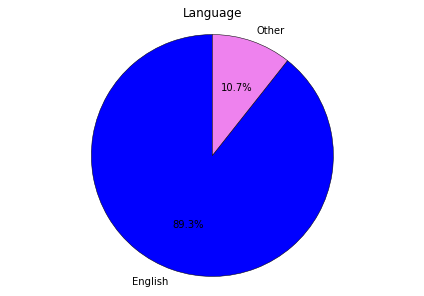

In [32]:
'''
Used to plot a pie distribution (count) of all the languages present
This would help make decision if we want to consider this features
'''
def plot_language_distribution(df):
    l = ['English', 'Other']
    val = []
    count = df.loc[df['language'] == 1].shape[0]
    val.append(count)
    temp = df.shape[0] - count
    val.append(temp)

    colors = ['blue', 'violet']
    fig1, ax1 = plt.subplots()
    ax1.pie(val, colors = colors, labels = l, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True})
    ax1.axis('equal')    
    plt.tight_layout()
    plt.title('Language')
    plt.show()
plot_language_distribution(df)

### 8. Plot Revenue vs Year (holiday and near a holiday)

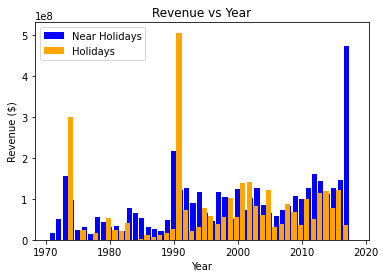

In [28]:
def plot_revenue_vs_year_helper(revenues, years):
    map = {}
    for i in range(len(revenues)):
        if years[i] in map:
            map[years[i]][0] += revenues[i]
            map[years[i]][1] += 1
        else:
            map[years[i]] = [revenues[i], 1]

    new_revenues = []
    new_years = []

    for itr in map:
        new_revenues.append(map[itr][0] / map[itr][1])
        new_years.append(itr)

    new_revenues = np.array(new_revenues, dtype = 'float32')
    new_years = np.array(new_years, dtype = 'float32')
    
    return new_revenues, new_years

def plot_revenue_vs_year():
    M = df.shape[0]
    revenue_holidays = []
    year_holidays = []
    revenue_near_holidays = []
    year_near_holidays = []

    for i in range(M):
        if (df.iloc[i]['is_holiday'] == 1) and df.iloc[i]['Year'] > 1970:
            revenue_holidays.append(df.iloc[i]['revenue'])
            year_holidays.append(df.iloc[i]['Year'])
        if (df.iloc[i]['is_near_holiday'] == 1) and df.iloc[i]['Year'] > 1970:
            revenue_near_holidays.append(df.iloc[i]['revenue'])
            year_near_holidays.append(df.iloc[i]['Year'])

    revenue_holidays, year_holidays = plot_revenue_vs_year_helper(revenue_holidays, year_holidays)
    revenue_near_holidays, year_near_holidays = plot_revenue_vs_year_helper(revenue_near_holidays, year_near_holidays)
    width = 0.8  
    plt.bar(year_near_holidays, revenue_near_holidays,    color='blue', width = width, label="Near Holidays")
    plt.bar(year_holidays+width, revenue_holidays, color='orange', width = width, label="Holidays")
    plt.xlabel('Year')
    plt.ylabel('Revenue ($)')
    plt.title("Revenue vs Year")
    plt.legend()
    plt.show()


plot_revenue_vs_year()

### 9. Revenue vs Year (Holiday, Near-Holiday, and Not-a-Holiday)

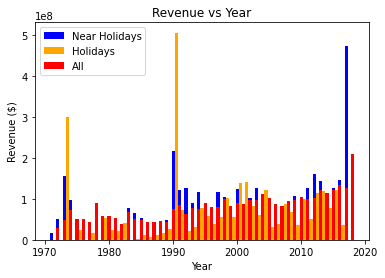

In [14]:
def plot_revenue_vs_year_mixed():

    # Initialising all the lists. 
    width = 0.25
    M = df.shape[0]
    revenue_holidays = []
    year_holidays = []
    revenue_near_holidays = []
    year_near_holidays = []
    revenue_all = []
    year_all = []

    for i in range(M):
        if df.iloc[i]['Year'] > 1970:
            revenue_all.append(df.iloc[i]['revenue'])
            year_all.append(df.iloc[i]['Year'])
        if (df.iloc[i]['is_holiday'] == 1) and df.iloc[i]['Year'] > 1970:
            revenue_holidays.append(df.iloc[i]['revenue'])
            year_holidays.append(df.iloc[i]['Year'])
        if (df.iloc[i]['is_near_holiday'] == 1) and df.iloc[i]['Year'] > 1970:
            revenue_near_holidays.append(df.iloc[i]['revenue'])
            year_near_holidays.append(df.iloc[i]['Year'])

    width = 0.5
    revenue_holidays, year_holidays = plot_revenue_vs_year_helper(revenue_holidays, year_holidays)
    revenue_near_holidays, year_near_holidays = plot_revenue_vs_year_helper(revenue_near_holidays, year_near_holidays)
    revenue_all, year_all = plot_revenue_vs_year_helper(revenue_all, year_all)
    plt.bar(year_near_holidays, revenue_near_holidays,color='blue', width = width, label="Near Holidays")
    plt.bar(year_holidays+width, revenue_holidays, color='orange', width = width, label="Holidays")
    plt.bar(year_all+2*width, revenue_all, color='red', width = width, label="All")
    plt.xlabel('Year')
    plt.ylabel('Revenue ($)')
    plt.title("Revenue vs Year")
    plt.legend()
    plt.show()

plot_revenue_vs_year_mixed()

### 10. Revenue vs Days

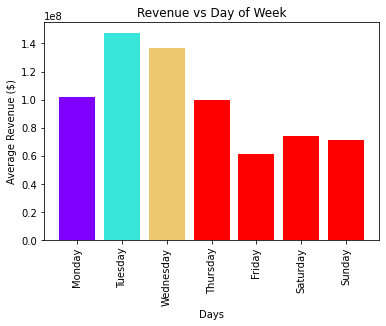

In [22]:
'''
Code to plot avergae revenue per day
'''
# 1. Function to actually plot the findings. 
def plot_days(x,y):
    colors = cm.rainbow(np.linspace(0, 5, 15))
    y = y.values
    y = y.reshape(-1)
    plt.bar(x,y,color=colors)    
    plt.xticks(rotation=90) 
    plt.xlabel('Days')
    plt.ylabel('Average Revenue ($)') 
    plt.title("Revenue vs Day of Week")
    plt.show()
    return

'''
# 2. Convert the string date to date object and find which "day (monday - friday)" a movie was released on 
'''
import calendar
def get_array_days(df):
    df_day_plot = df.groupby('Day')['revenue'].mean().reset_index()
    days = []
    for i in range(len(df_day_plot['Day'])):
        days.append(calendar.day_name[df_day_plot['Day'][i]])
    return df_day_plot,days

def plot_revenue_vs_days(df):
    # 1. 
    df_day_plot,days = get_array_days(df)
    # 2. 
    plot_days(days,df_day_plot['revenue'])

plot_revenue_vs_days(df)

### 11. Revenue vs Year

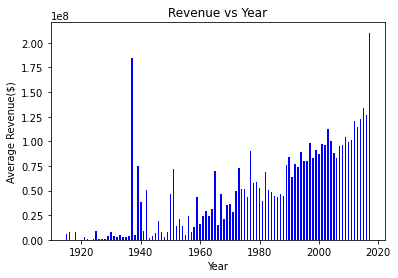

In [20]:
'''
Code to plot average revenue per year
1. we get theis grouped data then we plot it.
'''
def plot_year(x,y):
    idx     = np.argsort(y)
    y = np.array(y)[idx]
    x = np.array(x)[idx]
    plt.bar(x,y,width=0.5,color="blue")    
    plt.xlabel('Year')
    plt.ylabel('Average Revenue($)')
    plt.title("Revenue vs Year") 
    plt.show()
    return

# 2. Group revenue by year and then take the aveerage for that year.
def get_array_year(df):
    df_year_plot = df.groupby('Year')['revenue'].mean().reset_index()
    return df_year_plot

def plot_revenue_vs_year(df):
    # Get the array of average revenue grouped by year
    df_year_plot = get_array_year(df)
    # plot them
    plot_year(df_year_plot['Year'],df_year_plot['revenue'])

plot_revenue_vs_year(df)

### 12. Correlation Heat Map

<AxesSubplot:>

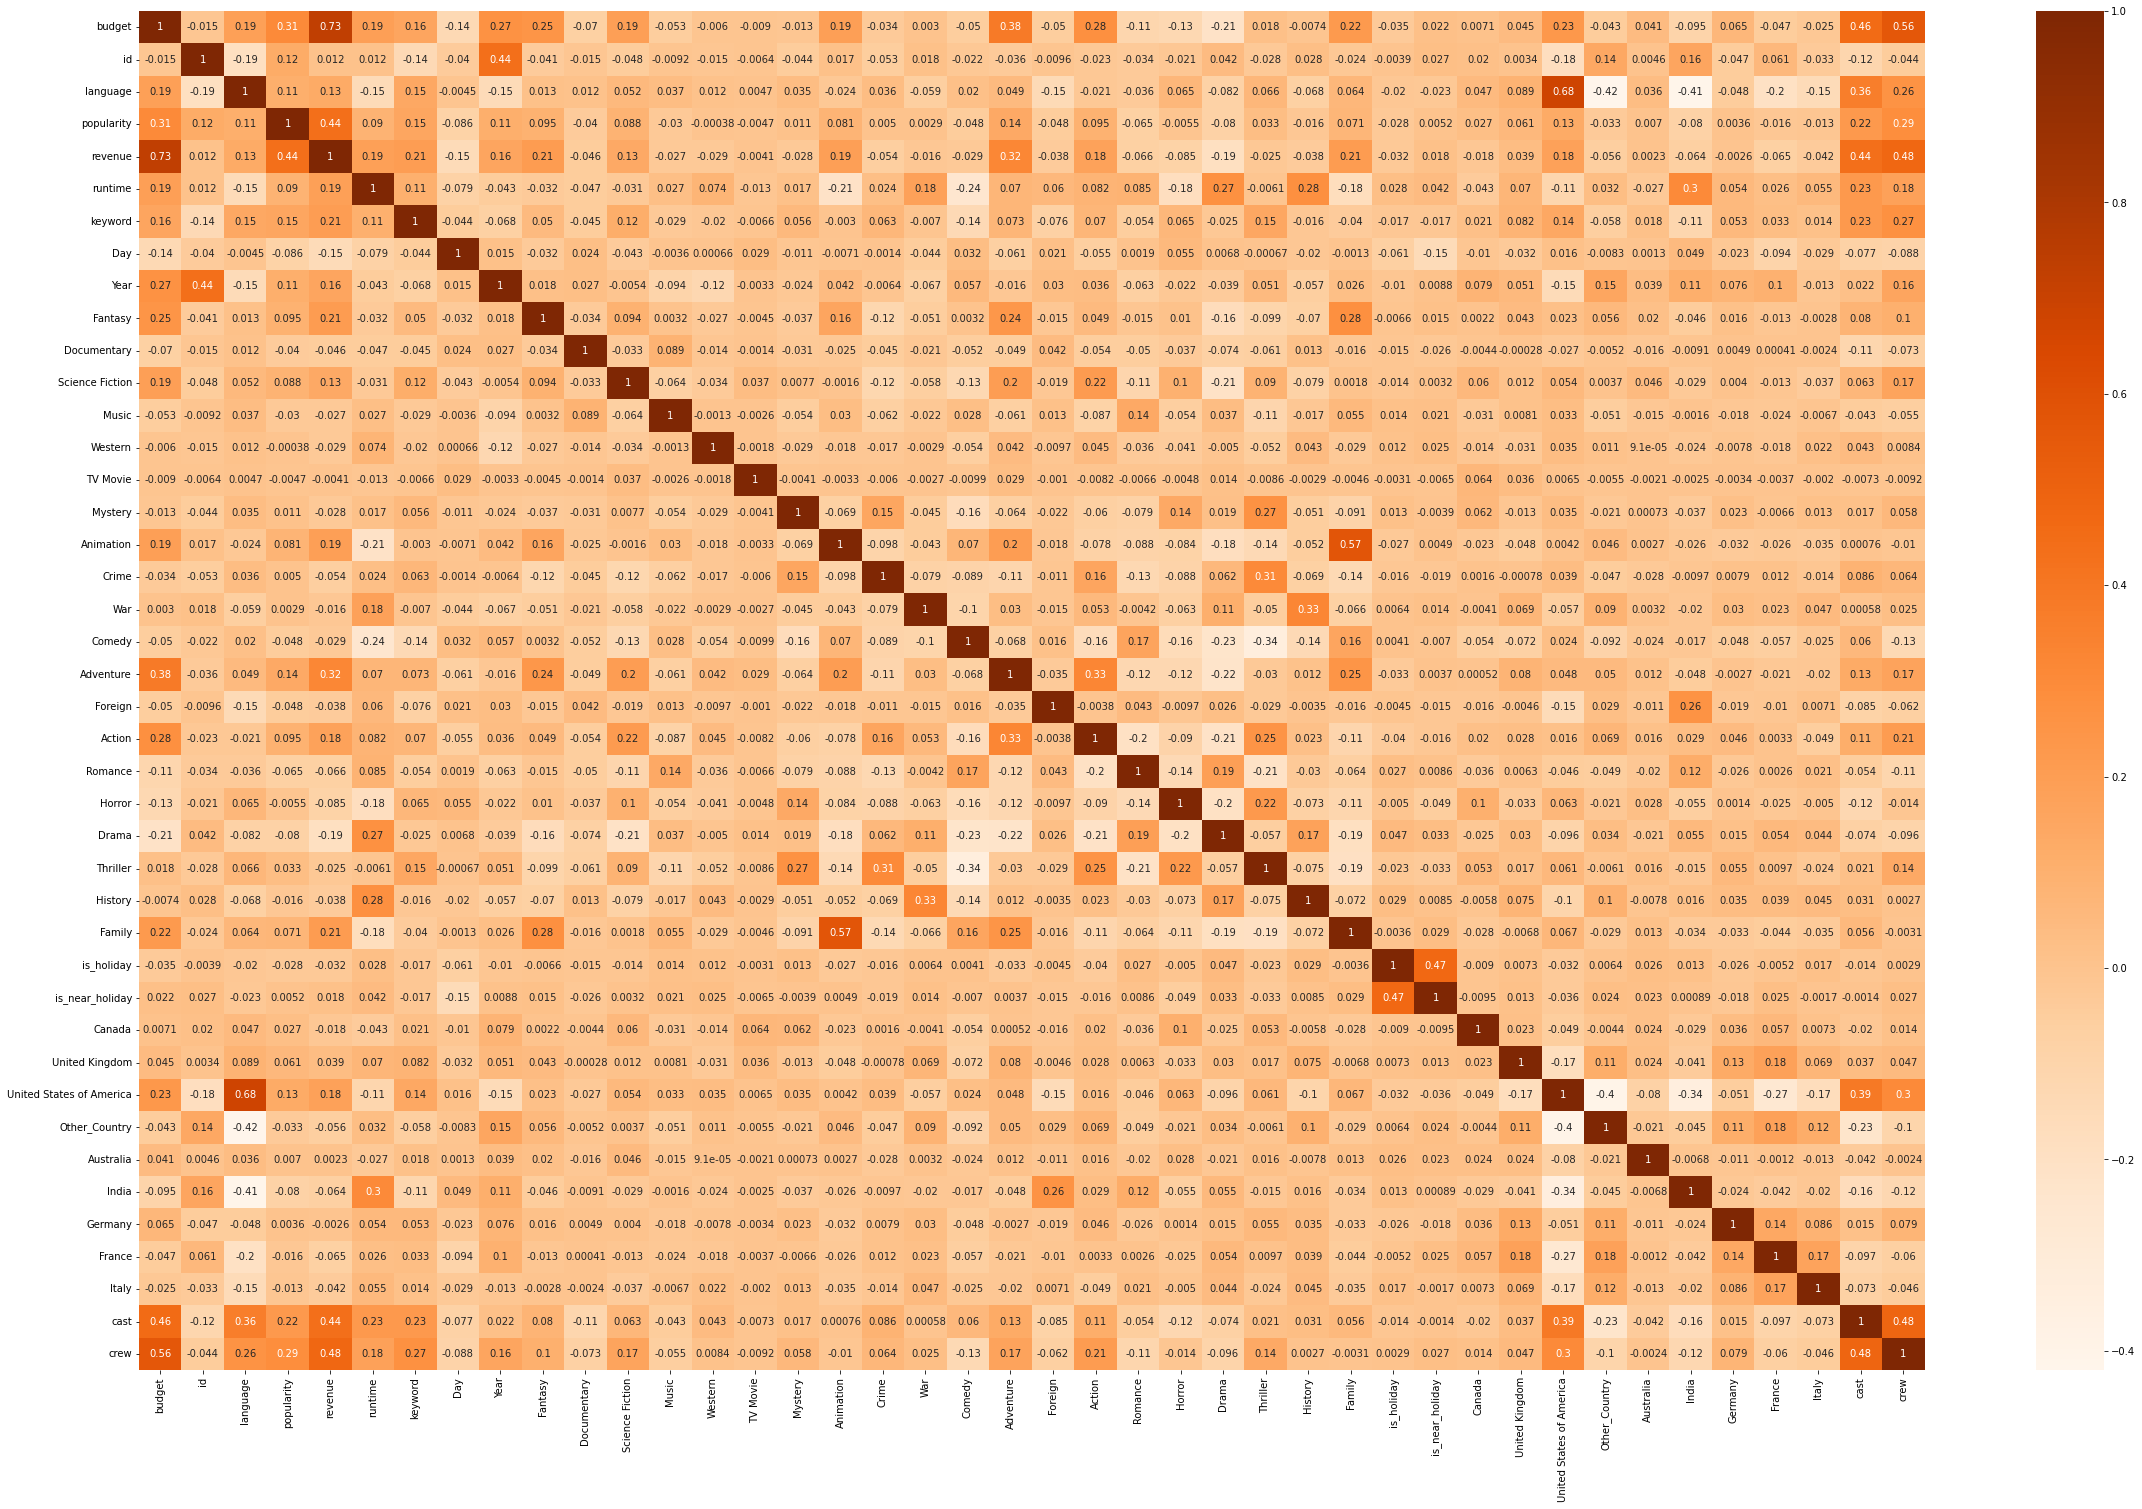

In [19]:
'''
Code to plot the correlation matrix of the features
helps us decide which columns are correlated and need to be dropped.
'''
plt.figure(figsize = (40,25))
sns.heatmap(df.corr(), cmap='Oranges', annot=True)